In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/use_feature_data_embedded.csv")

In [3]:
df

,image,emotion,d_first_eyebrow_reye,d_first_eyebrow_leye,circum_mouth,d_bottom_mouth_chin
0,facial-expressions_2868585k.jpg,7,28.460499,29.068884,122.200822,27.073973
1,facial-expressions_2868582k.jpg,3,24.698178,24.839485,121.277925,31.064449
2,Aaron_Peirsol_0003.jpg,4,23.769729,25.495098,131.053001,44.553339
3,Aaron_Sorkin_0002.jpg,4,25.553865,21.954498,176.923136,37.121422
4,Abdel_Nasser_Assidi_0002.jpg,5,25.709920,27.658633,94.492867,51.662365
...,...,...,...,...,...,...
24068,SURPRISE/surprise (971).png,7,50.219518,47.095647,132.779479,45.398238
24069,SURPRISE/surprise (978).jpg,7,39.293765,37.483330,100.903171,25.079872
24070,SURPRISE/surprise (981).png,7,30.000000,25.079872,162.066050,21.931712
24071,SURPRISE/surprise (983).jpg,7,43.566042,43.011626,118.447685,22.203603


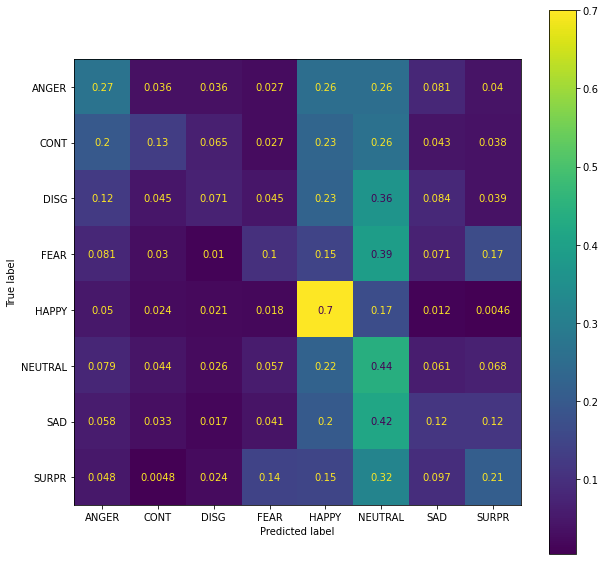

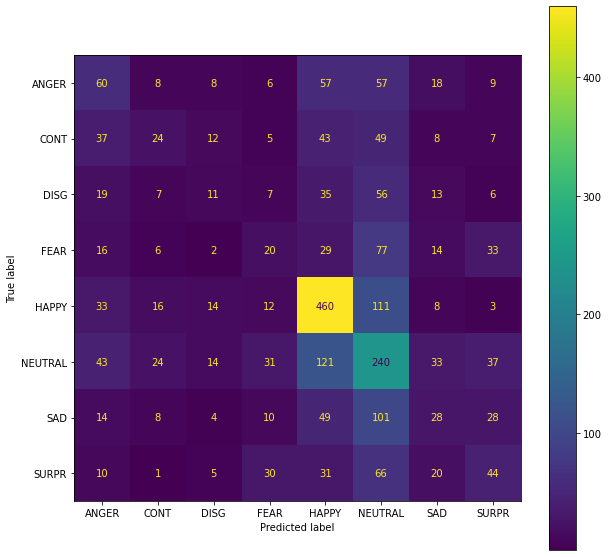

<Figure size 432x288 with 0 Axes>

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create model
clf = RandomForestClassifier(n_estimators=40)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
plt.savefig('evaluate_matrix/rf.jpg')

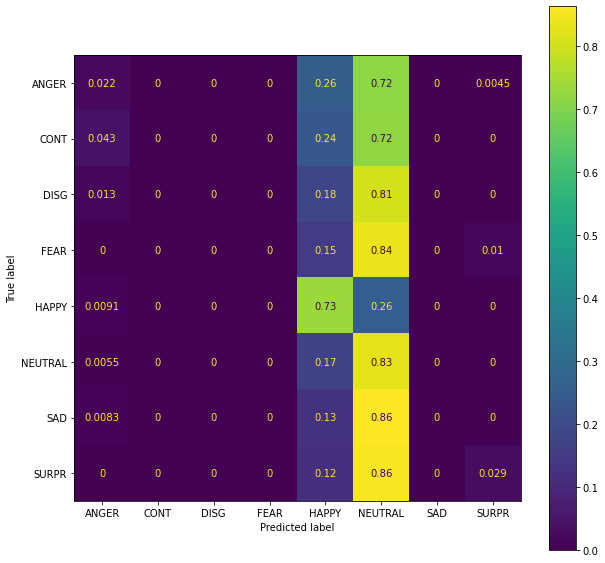

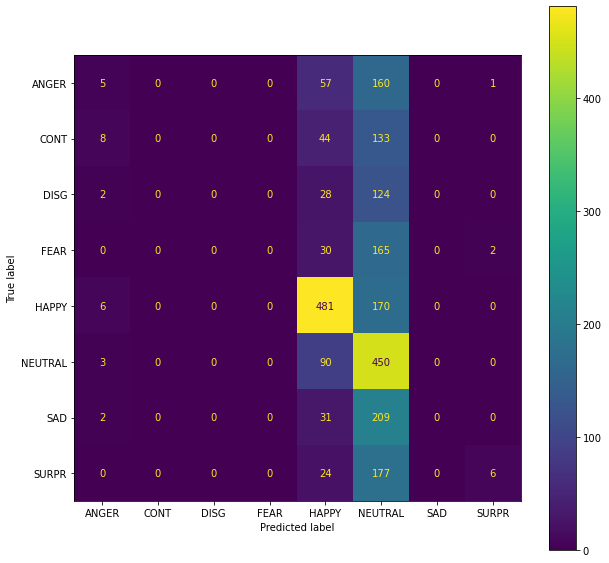

In [5]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='poly', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

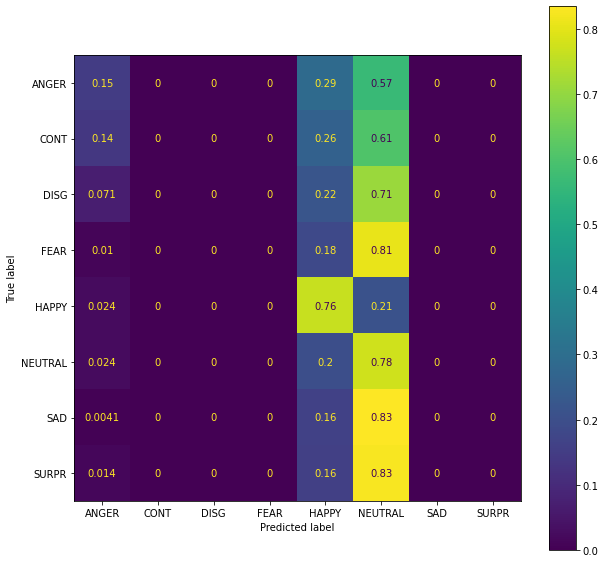

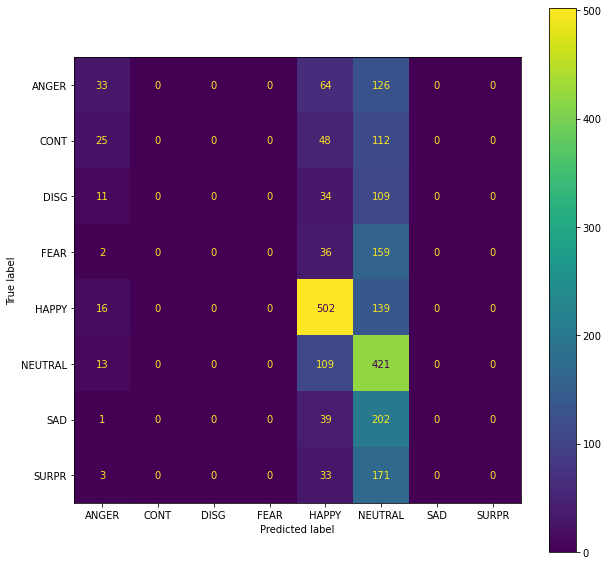

In [18]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='linear', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

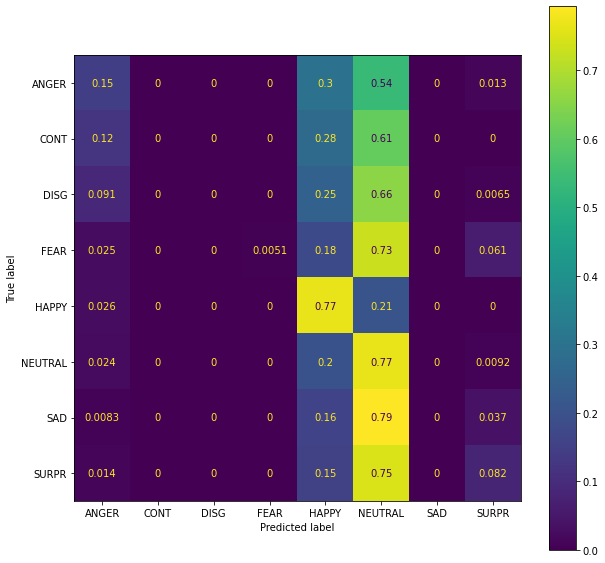

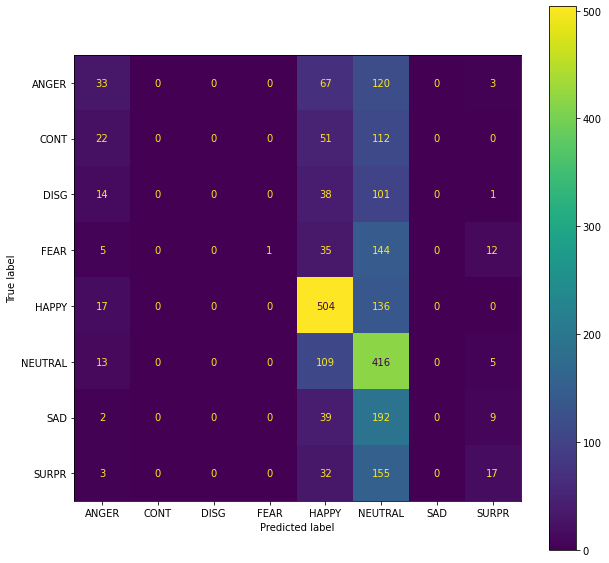

In [6]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='rbf', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


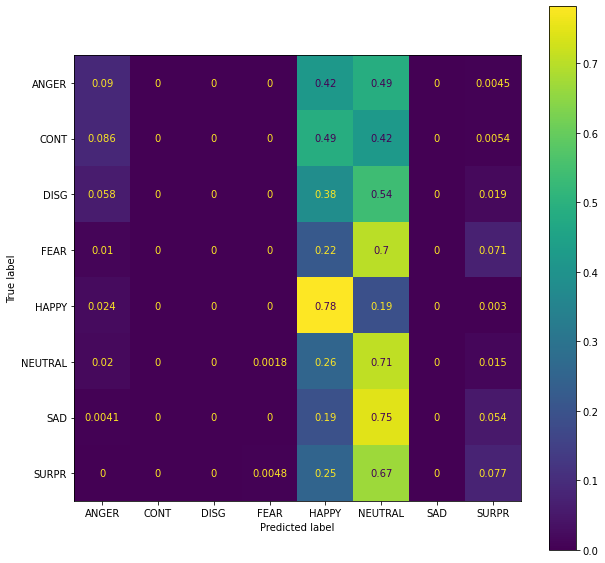

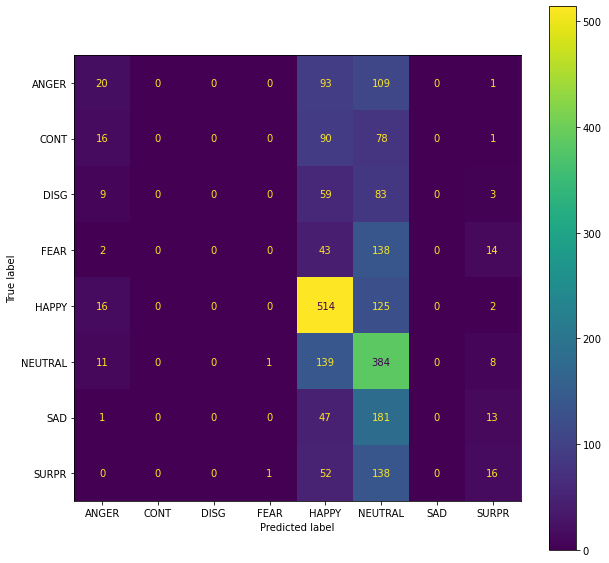

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = LogisticRegression()

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

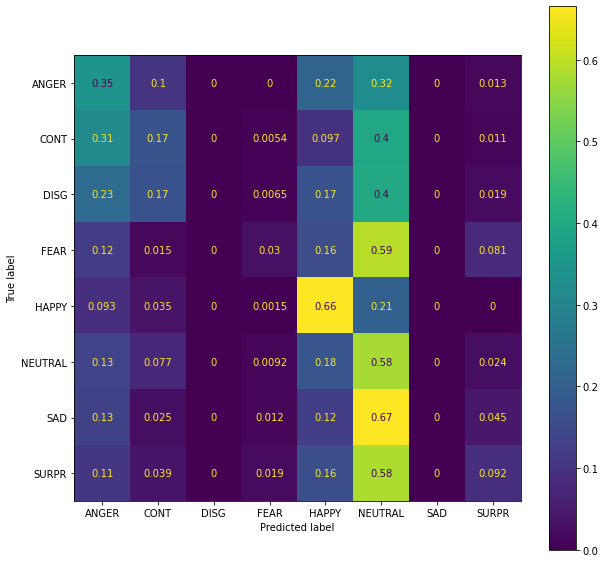

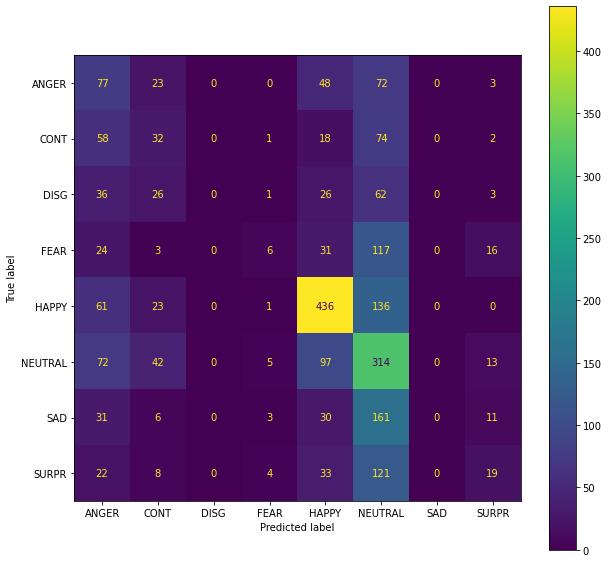

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = GaussianNB()

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()